In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.shape

(550068, 12)

In [5]:
# Checking for Null values
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [7]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

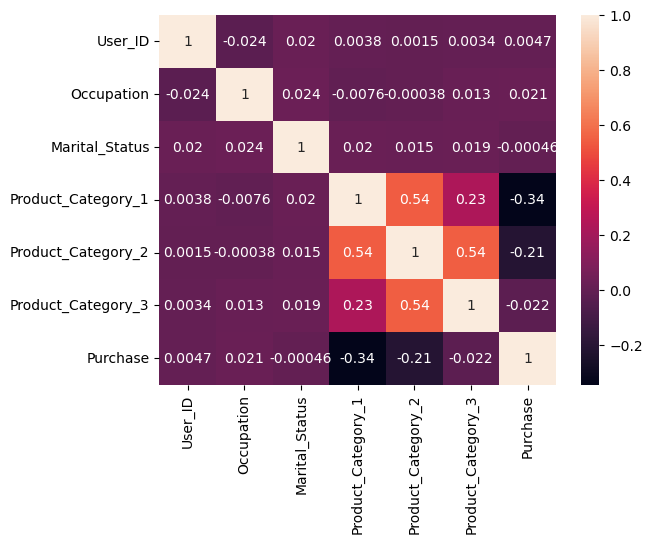

In [8]:
sns.heatmap(train.corr(), annot = True)
plt.show()

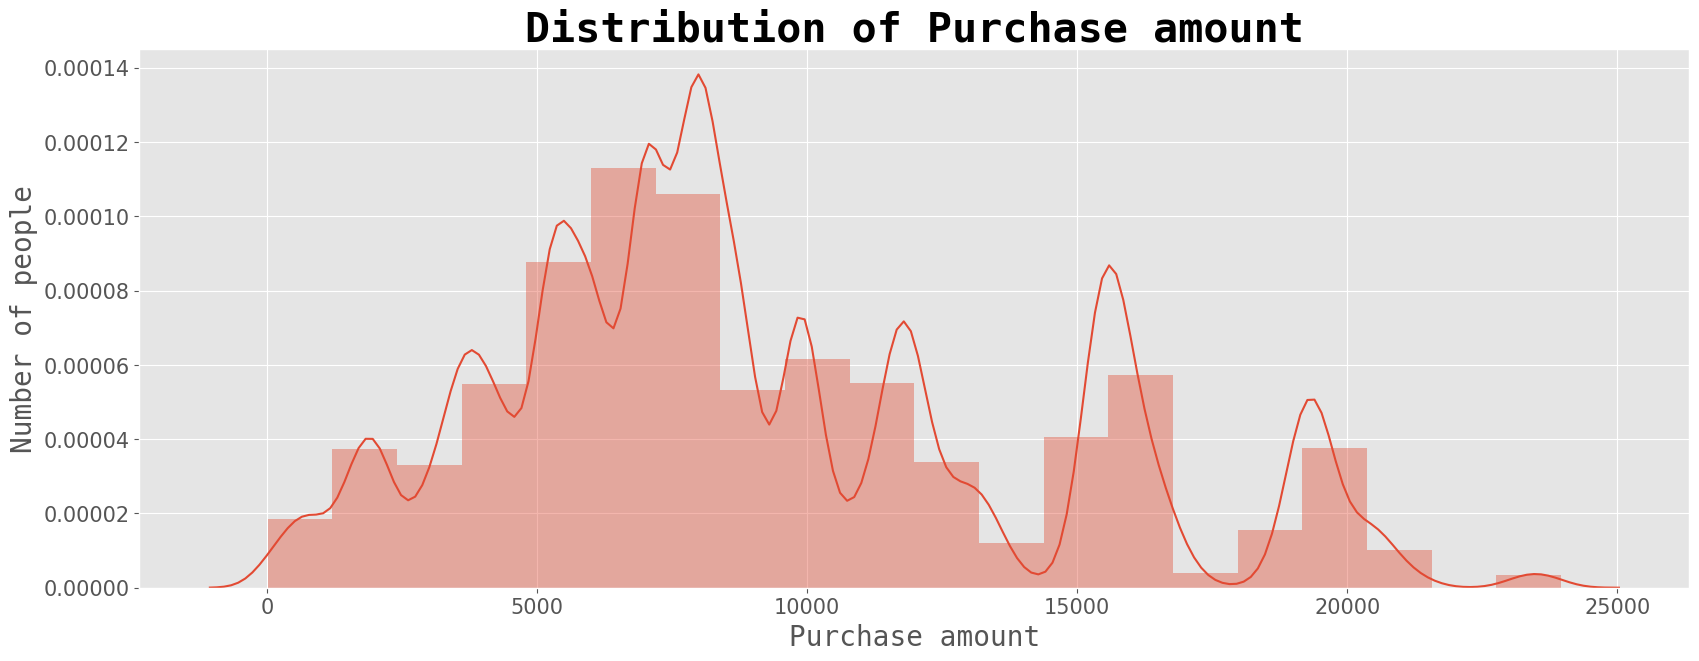

In [9]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

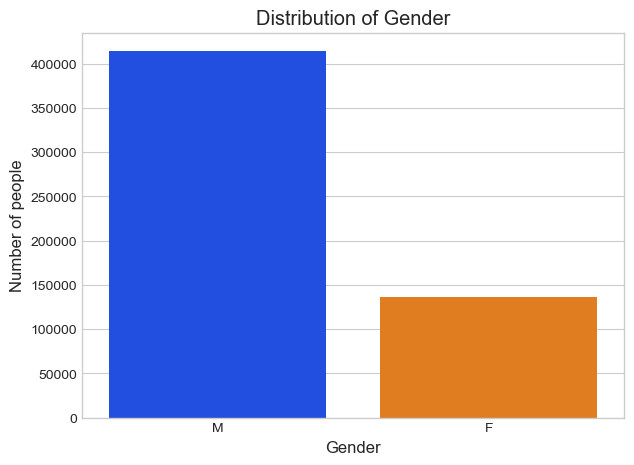

In [10]:
gen = train['Gender'].value_counts()
plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=gen.index, y=gen.values, palette = 'bright')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()

In [11]:
round((train['Gender'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

M    75.31 %
F    24.69 %
Name: Gender, dtype: object

In [12]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

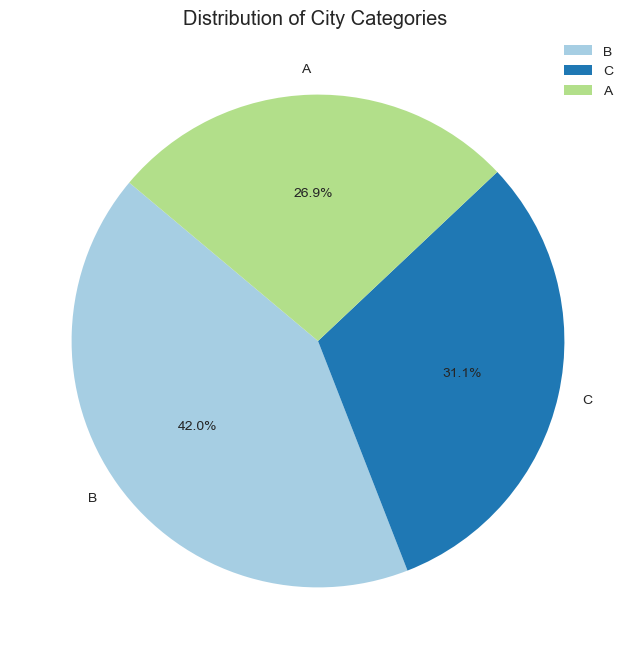

In [13]:
city_category_counts = train['City_Category'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_category_counts, labels=city_category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Paired'))
plt.title('Distribution of City Categories ')
plt.legend()
plt.show()

In [14]:
round((train['City_Category'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

B    42.03 %
C    31.12 %
A    26.85 %
Name: City_Category, dtype: object

In [15]:
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

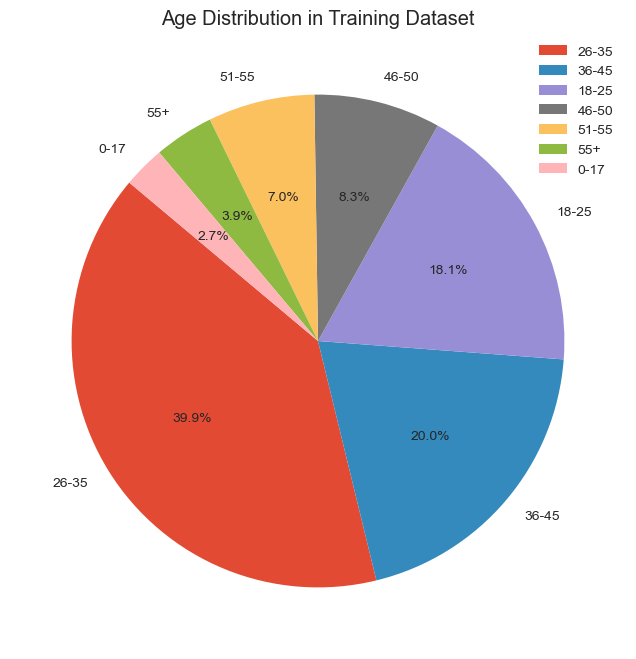

In [16]:
age_counts = train['Age'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Age Distribution in Training Dataset')
plt.legend()

# Display the pie chart
plt.show()

In [17]:
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

In [18]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

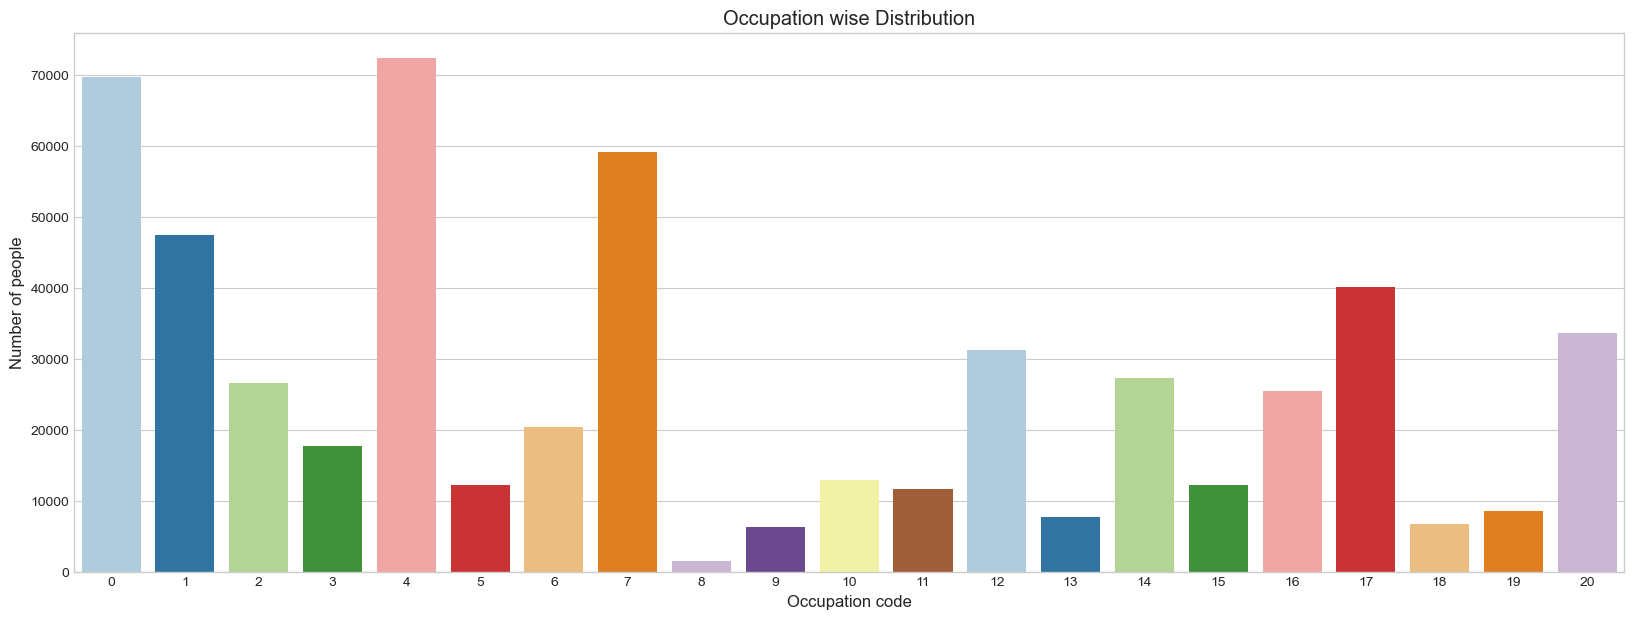

In [19]:
occupation = train['Occupation'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=occupation.index, y=occupation.values, palette = 'Paired')
plt.title('Occupation wise Distribution')
plt.xlabel('Occupation code')
plt.ylabel('Number of people')
plt.show()

In [20]:
round((train['Occupation'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

4     13.15 %
0     12.66 %
7     10.75 %
1      8.62 %
17     7.28 %
20      6.1 %
12     5.67 %
14     4.96 %
2      4.83 %
16     4.61 %
6       3.7 %
3      3.21 %
10     2.35 %
5      2.21 %
15     2.21 %
11     2.11 %
19     1.54 %
13      1.4 %
18      1.2 %
9      1.14 %
8      0.28 %
Name: Occupation, dtype: object

In [21]:
train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

<Axes: xlabel='Gender', ylabel='Purchase'>

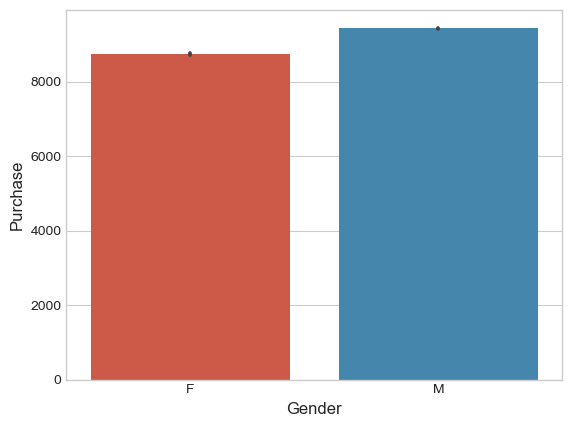

In [22]:
sns.barplot(x='Gender',y='Purchase',data=train)

<Axes: xlabel='Occupation', ylabel='Purchase'>

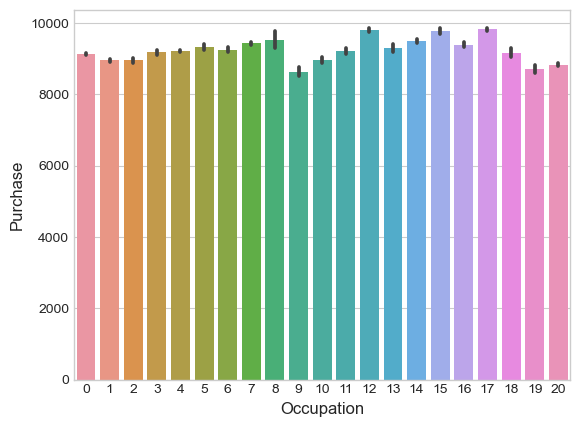

In [23]:
sns.barplot(x='Occupation',y='Purchase',data=train)

<Axes: xlabel='Age', ylabel='Purchase'>

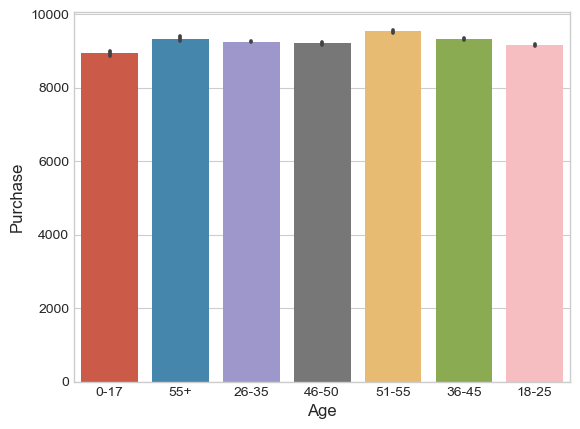

In [24]:
sns.barplot(x='Age',y='Purchase',data=train)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

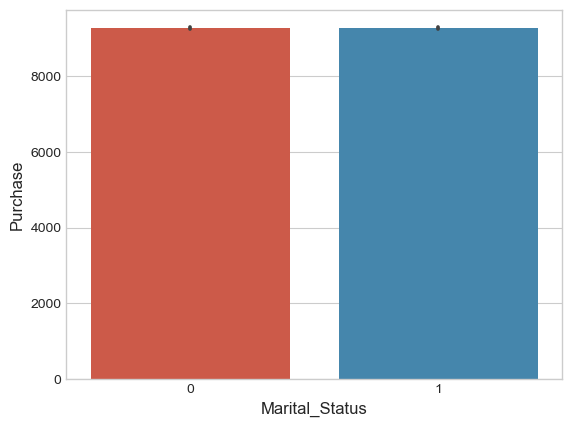

In [25]:
sns.barplot(x='Marital_Status',y='Purchase',data=train)

<Axes: xlabel='City_Category', ylabel='Purchase'>

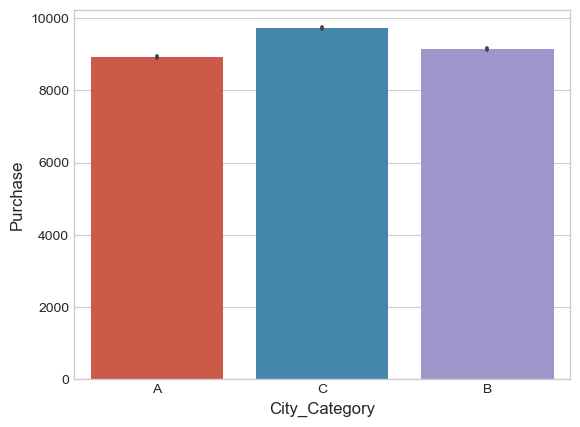

In [26]:
sns.barplot(x='City_Category',y='Purchase',data=train)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

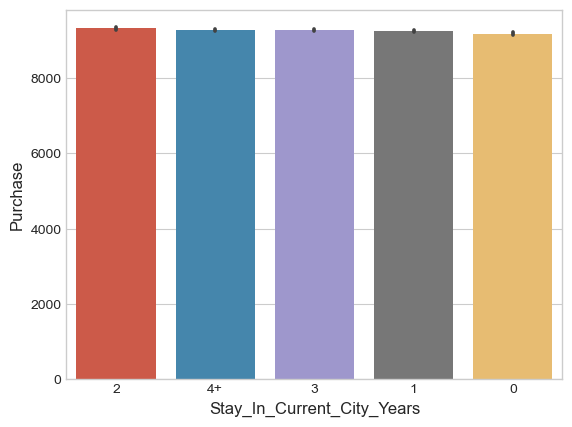

In [27]:
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=train)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

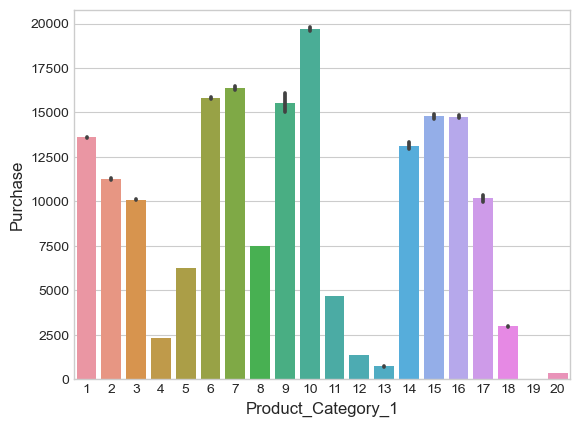

In [28]:
sns.barplot(x='Product_Category_1',y='Purchase',data=train)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

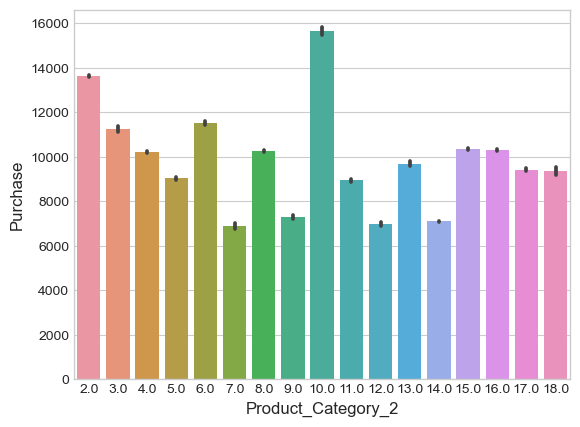

In [29]:
sns.barplot(x='Product_Category_2',y='Purchase',data=train)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

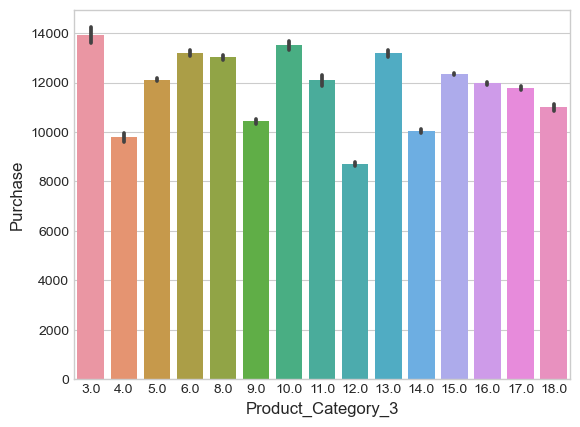

In [30]:
sns.barplot(x='Product_Category_3',y='Purchase',data=train)

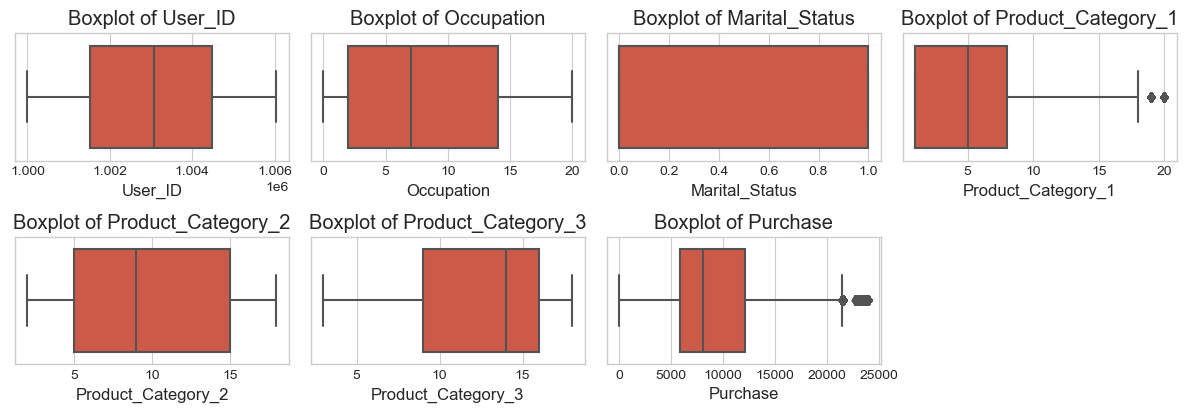

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))

numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns


for i, col in enumerate(numeric_cols):
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=col, data=train)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [32]:
upper_limit = train['Product_Category_1'].quantile(0.75)
lower_limit = train['Product_Category_1'].quantile(0.25)
print(upper_limit)
print(lower_limit)

8.0
1.0


In [33]:
train = train[(train['Product_Category_1'] <= 8.0) & (train['Product_Category_1']>=1.0)]

<Axes: >

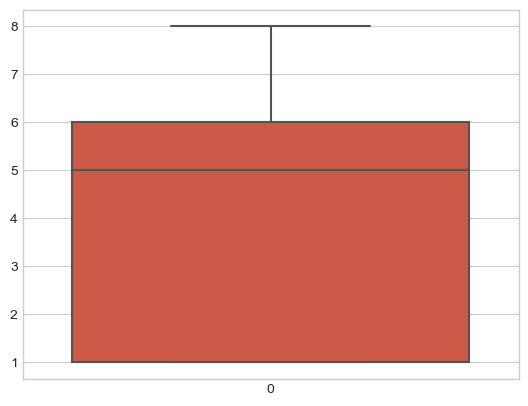

In [34]:
sns.boxplot(train['Product_Category_1'])

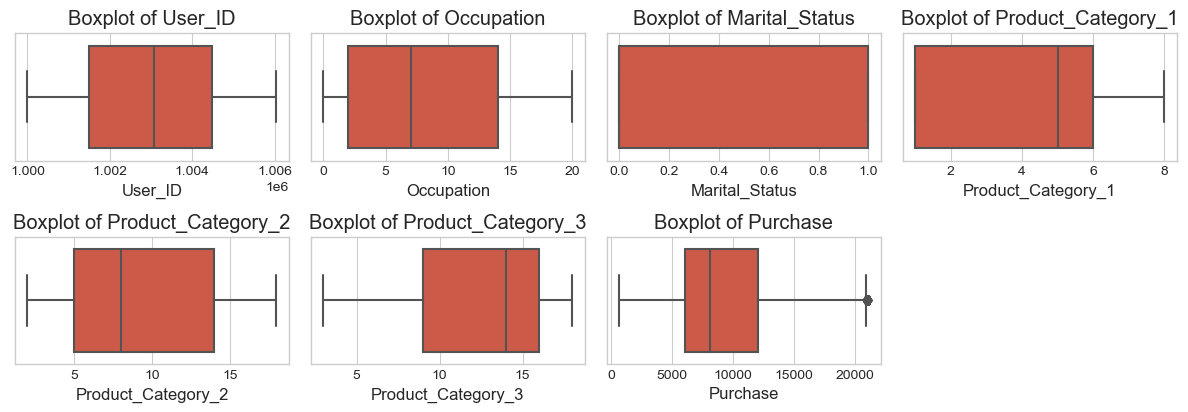

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))

# Select only numeric columns
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns


for i, col in enumerate(numeric_cols):
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=col, data=train)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [36]:
train.shape

(485253, 12)

In [37]:
train['Age'] = train['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [38]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [39]:
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            28.19 %
Product_Category_3            66.67 %
Purchase                        0.0 %
dtype: object

In [40]:
train['Product_Category_2'].fillna(train['Product_Category_2'].median(), inplace = True)

In [41]:
train['Product_Category_3'].fillna(train['Product_Category_3'].median(), inplace = True)

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['Age'] = label_encoder.fit_transform(train['Age'])
train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['City_Category'] = label_encoder.fit_transform(train['City_Category'])
print(train['Age'].unique())
print(train['Gender'].unique())
print(train['City_Category'].unique())

[0 6 2 4 5 3 1]
[0 1]
[0 2 1]


In [43]:
train.drop('User_ID', axis = 1, inplace = True)

In [44]:
train.drop('Product_ID', axis = 1, inplace = True)

In [45]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype('int')

In [46]:
X = train.drop("Purchase", axis = 1)

In [47]:
Y = train["Purchase"]

In [48]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,8.0,14.0
1,0,0,10,0,2,0,1,6.0,14.0
4,1,6,16,2,4,0,8,8.0,14.0
5,1,2,15,0,3,0,1,2.0,14.0
6,1,4,7,1,2,1,1,8.0,17.0
...,...,...,...,...,...,...,...,...,...
545910,1,2,6,1,2,0,8,8.0,14.0
545911,1,2,6,1,2,0,5,8.0,14.0
545912,1,2,6,1,2,0,8,8.0,14.0
545913,1,2,6,1,2,0,5,8.0,14.0


In [49]:
Y

0          8370
1         15200
4          7969
5         15227
6         19215
          ...  
545910     9855
545911     1962
545912     7852
545913     7159
545914    11640
Name: Purchase, Length: 485253, dtype: int64

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()
selector.fit(X, Y)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 0.66
1 3.27
2 7.31
3 0.83
4 3.89
5 0.97
6 73.92
7 5.44
8 3.71


In [52]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

In [53]:
X

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,0,10,2,3,8.0,14.0
1,0,10,2,1,6.0,14.0
4,6,16,4,8,8.0,14.0
5,2,15,3,1,2.0,14.0
6,4,7,2,1,8.0,17.0
...,...,...,...,...,...,...
545910,2,6,2,8,8.0,14.0
545911,2,6,2,5,8.0,14.0
545912,2,6,2,8,8.0,14.0
545913,2,6,2,5,8.0,14.0


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [55]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (388202, 6)
X_test shape: (97051, 6)
Y_train shape: (388202,)
Y_test shape: (97051,)


In [56]:
from sklearn import metrics
l=[]

def predict(ml_model):
    model=ml_model.fit(X_train,Y_train)
    print('Score : {}'.format(model.score(X_train,Y_train)))
    y_prediction=model.predict(X_test)
    l.append(model)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')

    r2_score=metrics.r2_score(Y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(Y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(Y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_prediction)))

In [57]:
from sklearn.linear_model import LinearRegression
regression = predict(LinearRegression())
regression

Score : 0.2336713730548189
predictions are: 
 [12400.50049063  9044.42973247  8959.4595304  ... 12319.99005351
 12099.78098302  8904.65566687]


r2 score: 0.2350074963142148
MAE: 3184.7135768339067
MSE: 16713835.98012596
RMSE: 4088.255860403793


In [58]:
from sklearn.neighbors import KNeighborsRegressor
regression = predict(KNeighborsRegressor())
regression

Score : 0.5944325459780176
predictions are: 
 [16182.8  6297.6  4923.  ... 13273.  11811.2  6370.6]


r2 score: 0.5361294675765802
MAE: 2382.8360882422644
MSE: 10134813.030956507
RMSE: 3183.52211095769


In [59]:
from sklearn.tree import DecisionTreeRegressor
regression = predict(DecisionTreeRegressor())
regression

Score : 0.6659289753885691
predictions are: 
 [16643.56666667  6087.07692308  6382.2097561  ... 12824.85714286
 11647.02666667  5833.60846561]


r2 score: 0.5609088618497537
MAE: 2305.3912774095866
MSE: 9593423.762992114
RMSE: 3097.3252594766527


In [60]:
import xgboost 

from xgboost import XGBRegressor
regression = predict(XGBRegressor())
regression

Score : 0.6165066165674503
predictions are: 
 [16211.522   6261.9214  6353.5146 ... 12650.883  11610.754   6026.1143]


r2 score: 0.6100659191927245
MAE: 2217.268752116744
MSE: 8519422.397308763
RMSE: 2918.80496047762


In [61]:
from sklearn.ensemble import RandomForestRegressor
regression = predict(RandomForestRegressor())
regression

Score : 0.662514002091837
predictions are: 
 [16731.79854254  6142.67587093  6395.53955614 ... 12872.01126869
 11700.54848315  5828.46952938]


r2 score: 0.581434215751842
MAE: 2271.1469003739608
MSE: 9144978.324767992
RMSE: 3024.066521220721


In [62]:
from sklearn.ensemble import ExtraTreesRegressor

regression = predict(ExtraTreesRegressor())

Score : 0.6659289749783397
predictions are: 
 [16643.56666667  6087.07692308  6382.2097561  ... 12824.85714286
 11647.02666667  5833.60846561]


r2 score: 0.5703500736851898
MAE: 2288.4264387450717
MSE: 9387148.714137627
RMSE: 3063.8454128982467


In [63]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost 

# Assuming X_train, Y_train, X_test, and Y_test are defined

result_df = pd.DataFrame(columns=['Model', 'Score', 'R2 Score', 'RMSE'])

def predict(ml_model, model_name):
    global result_df

    model = ml_model.fit(X_train, Y_train)
    score = model.score(X_train, Y_train)
    y_prediction = model.predict(X_test)

    r2_score = metrics.r2_score(Y_test, y_prediction)
    #mae = metrics.mean_absolute_error(Y_test, y_prediction)
    mse = metrics.mean_squared_error(Y_test, y_prediction)
    rmse = np.sqrt(mse)

    result_df = result_df.append({
        'Model': model_name,
        'Score': score,
        'R2 Score': r2_score,
        #'MAE': mae,
        #'MSE': mse,
        'RMSE': rmse
    }, ignore_index=True)

   

# Example usage:
#predict(RandomForestRegressor(), 'RandomForestRegressor')
predict(LinearRegression(),'LinearRegression')
predict(KNeighborsRegressor(),'KNeighborsRegressor')
predict(DecisionTreeRegressor(),'DecisionTreeRegressor')
predict(XGBRegressor(),'XGBRegressor')
predict(RandomForestRegressor(),'RandomForestRegressor')
predict(ExtraTreesRegressor(),'ExtraTreesRegressor')

# Print the dataframe in a tabular format
print(result_df.to_markdown(index=False))


| Model                 |    Score |   R2 Score |    RMSE |
|:----------------------|---------:|-----------:|--------:|
| LinearRegression      | 0.233671 |   0.235007 | 4088.26 |
| KNeighborsRegressor   | 0.594433 |   0.536129 | 3183.52 |
| DecisionTreeRegressor | 0.665929 |   0.560659 | 3098.21 |
| XGBRegressor          | 0.616507 |   0.610066 | 2918.8  |
| RandomForestRegressor | 0.662499 |   0.581655 | 3023.27 |
| ExtraTreesRegressor   | 0.665929 |   0.570433 | 3063.55 |


In [69]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [70]:
degree = 2
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
mdl=poly_reg.fit(X_train, Y_train)
poly_reg_accuracy = poly_reg.score(X_test, Y_test)
Y_pred = mdl.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
kf=KFold(n_splits=5,shuffle=True,random_state=42)
print(f"Polynomial Regression Accuracy: {poly_reg_accuracy*100}")
cv_poly_reg=cross_val_score(mdl,X,Y,cv=kf)
print(f"Cross-validated Polynomial Regression Accuracy: {cv_poly_reg.mean()*100}")

MSE: 14263940.828560643
R-squared: 0.347139231242817
MAE: 2734.297656804825
RMSE: 3776.7632740960403
Polynomial Regression Accuracy: 34.7139231242817
Cross-validated Polynomial Regression Accuracy: 34.61370683111341


In [71]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, Y_train)
ridge_reg_accuracy = ridge_reg.score(X_test, Y_test)
Y_pred = ridge_reg.predict(X_test)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Ridge Regression Accuracy: {ridge_reg_accuracy*100}")
cv_ridge_reg = cross_val_score(Ridge(), X, Y, cv=kf)
print(f"Cross-validated Ridge Regression Accuracy: {cv_ridge_reg.mean()*100}")
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")



Ridge Regression Accuracy: 23.50074955045325
Cross-validated Ridge Regression Accuracy: 23.391689814773247
MSE: 16713835.997816196
R-squared: 0.23500749550453248
MAE: 3184.7135373434685
RMSE: 4088.2558625673364


In [72]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, Y_train)
lasso_reg_accuracy = lasso_reg.score(X_test, Y_test)
Y_pred = lasso_reg.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Lasso Regression Accuracy: {lasso_reg_accuracy*100}")
cv_lasso_reg = cross_val_score(Lasso(), X, Y, cv=kf)
print(f"Cross-validated Lasso Regression Accuracy: {cv_lasso_reg.mean()*100}")

MSE: 16713878.327890698
R-squared: 0.23500555805643775
MAE: 3184.702311339914
RMSE: 4088.261039597484
Lasso Regression Accuracy: 23.500555805643774
Cross-validated Lasso Regression Accuracy: 23.391681804544916


In [73]:
l[0]

LinearRegression()

In [74]:
l[1]

KNeighborsRegressor()

In [75]:
l[2]

DecisionTreeRegressor()

In [76]:
l[3]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
l[4]

RandomForestRegressor()

In [78]:
l[5]

ExtraTreesRegressor()

In [80]:
import joblib
joblib.dump(l[3], "mymodel.pkl")
model = joblib.load('mymodel.pkl' )
print()
model.predict([[2,6,2,1,2,11.0]])[0]

13989.3125